In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
RANDOM_SEED = 42
DIMENSIONS = 3
DATASET_PATH = '/content/drive/MyDrive/NULP/Masters/Year-1/ML/keypoints.csv'

In [4]:
X = np.loadtxt(DATASET_PATH, delimiter=',', dtype='float32', usecols=list(range(1, (21 * DIMENSIONS) + 1)))
y = np.loadtxt(DATASET_PATH, delimiter=',', dtype='int32', usecols=(0))

In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([527, 574, 764, 412]))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=RANDOM_SEED)

print(len(y_train))
print(len(y_test))

2049
228


In [7]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 5))
    epochs = np.arange(1, len(history.history['accuracy']) + 1)
    print(f"loss: {history.history['loss'][-1]} - accuracy: {history.history['accuracy'][-1]} - val_loss: {history.history['val_loss'][-1]} - val_accuracy: {history.history['val_accuracy'][-1]}")
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

# Lab 1
Відтворення експерименту статті

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense (Dense)               (None, 20)                1280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1534 (5.99 KB)
Trainable params: 1534 (5.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [17]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[es_callback]
)

Epoch 1/1000
17/17 [==============================] - 0s 8ms/step - loss: 0.9387 - accuracy: 0.5949 - val_loss: 0.8016 - val_accuracy: 0.7061
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9480 - accuracy: 0.5944 - val_loss: 0.8116 - val_accuracy: 0.7632
Epoch 3/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.9442 - accuracy: 0.5925 - val_loss: 0.7365 - val_accuracy: 0.7982
Epoch 4/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.9458 - accuracy: 0.5998 - val_loss: 0.7950 - val_accuracy: 0.7982
Epoch 5/1000
17/17 [==============================] - 0s 23ms/step - loss: 0.9403 - accuracy: 0.5920 - val_loss: 0.7000 - val_accuracy: 0.8114
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.9136 - accuracy: 0.6154 - val_loss: 0.7430 - val_accuracy: 0.7807
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9235 - accuracy: 0.5993 - val_loss: 0.7204 - val_accuracy: 0.7982
Epoch

loss: 0.938622772693634 - accuracy: 0.6002928018569946 - val_loss: 0.7426036596298218 - val_accuracy: 0.8289473652839661


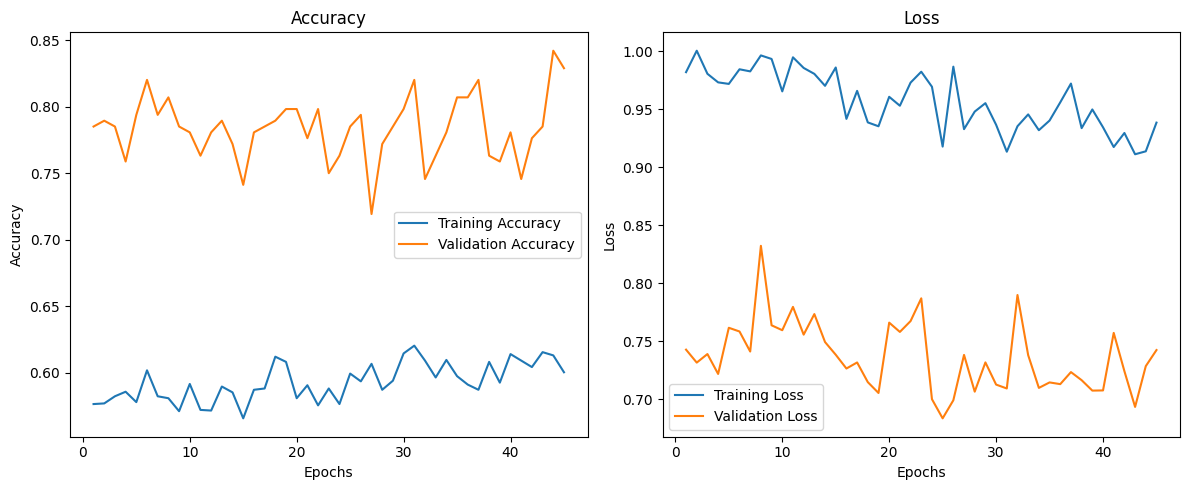

In [15]:
plot_loss_accuracy(history)

In [18]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 8ms/step - loss: 0.7203 - accuracy: 0.7939


loss: 0.7203 - accuracy: 0.7939

Article: loss: 0.6701 - accuracy: 0.88

# Lab 2

Покращення результатів

In [19]:

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

models = [
    model_2,
    model_3,
    model_4,
    model_5,
    model_6
    ]

Model 0
Epoch 148: early stopping
loss: 0.9432422518730164 - accuracy: 0.6037091016769409 - val_loss: 0.7148343920707703 - val_accuracy: 0.8026315569877625


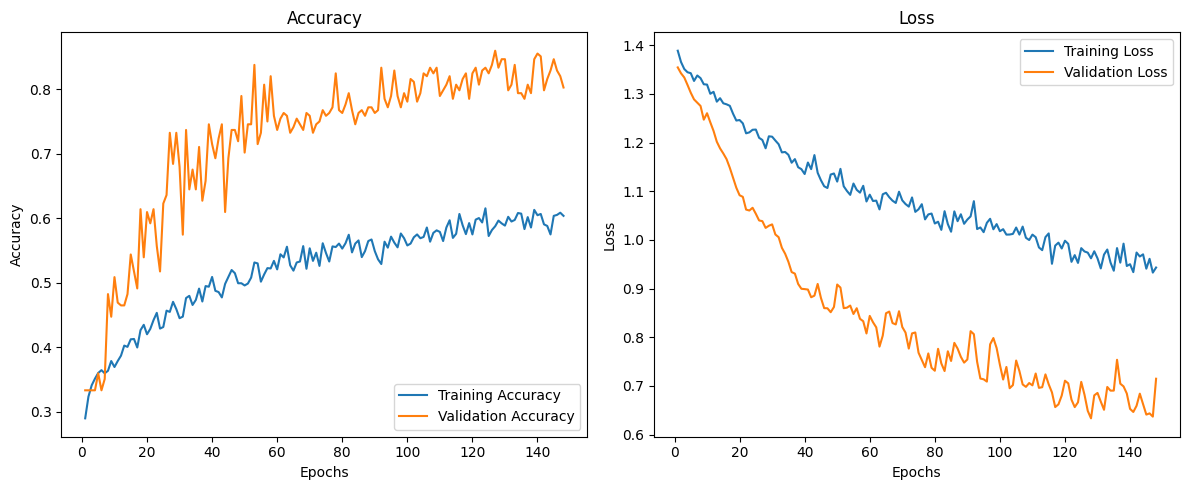

2/2 [==============================] - 0s 7ms/step - loss: 0.7148 - accuracy: 0.8026
Model 1
Epoch 165: early stopping
loss: 0.6956149339675903 - accuracy: 0.7164470553398132 - val_loss: 0.5947266817092896 - val_accuracy: 0.7938596606254578


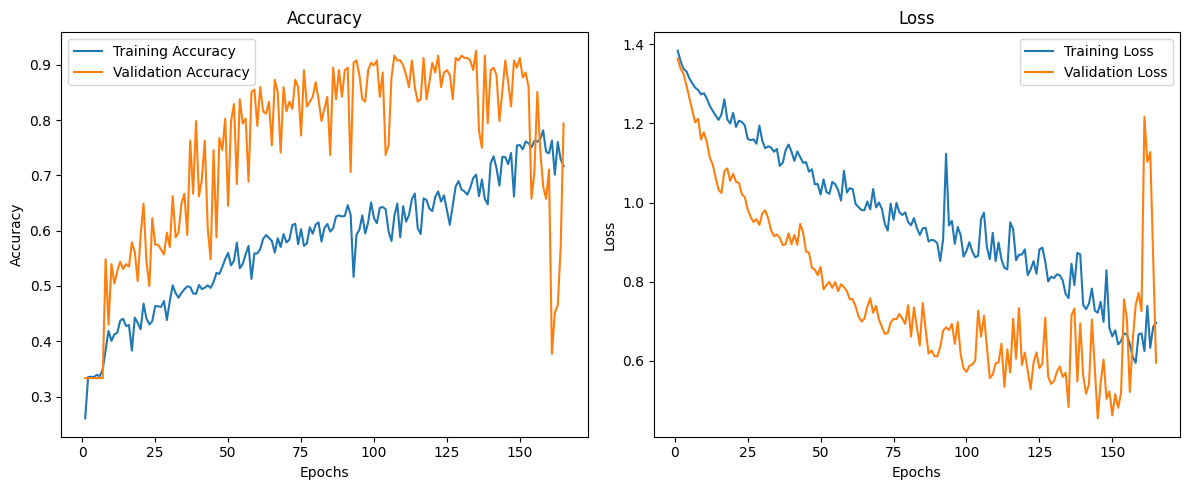

2/2 [==============================] - 0s 9ms/step - loss: 0.5947 - accuracy: 0.7939
Model 2
Epoch 422: early stopping
loss: 1.0418674945831299 - accuracy: 0.5651537179946899 - val_loss: 0.8593877553939819 - val_accuracy: 0.780701756477356


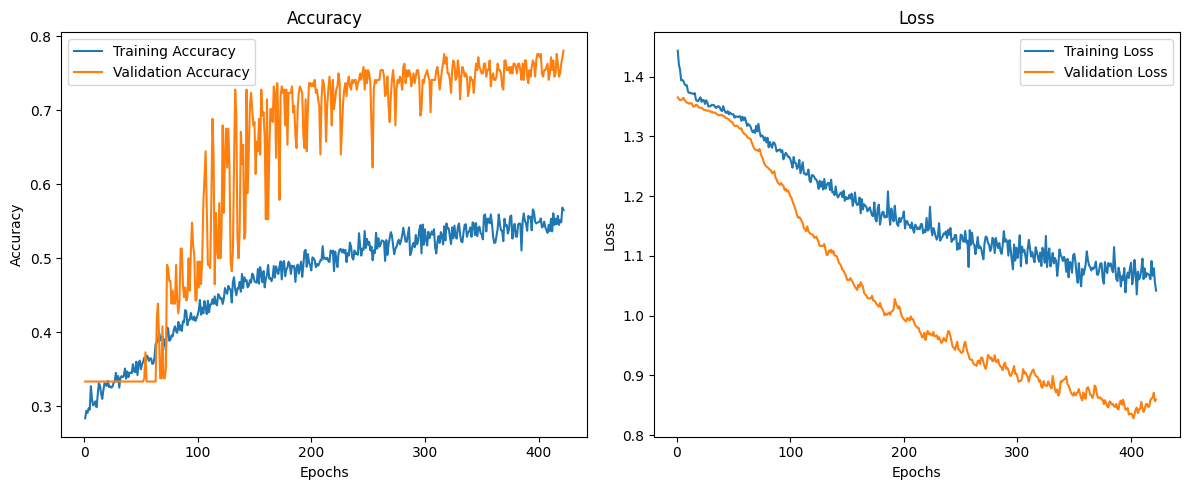

2/2 [==============================] - 0s 8ms/step - loss: 0.8594 - accuracy: 0.7807
Model 3
Epoch 184: early stopping
loss: 1.1781421899795532 - accuracy: 0.4602245092391968 - val_loss: 1.0093371868133545 - val_accuracy: 0.7236841917037964


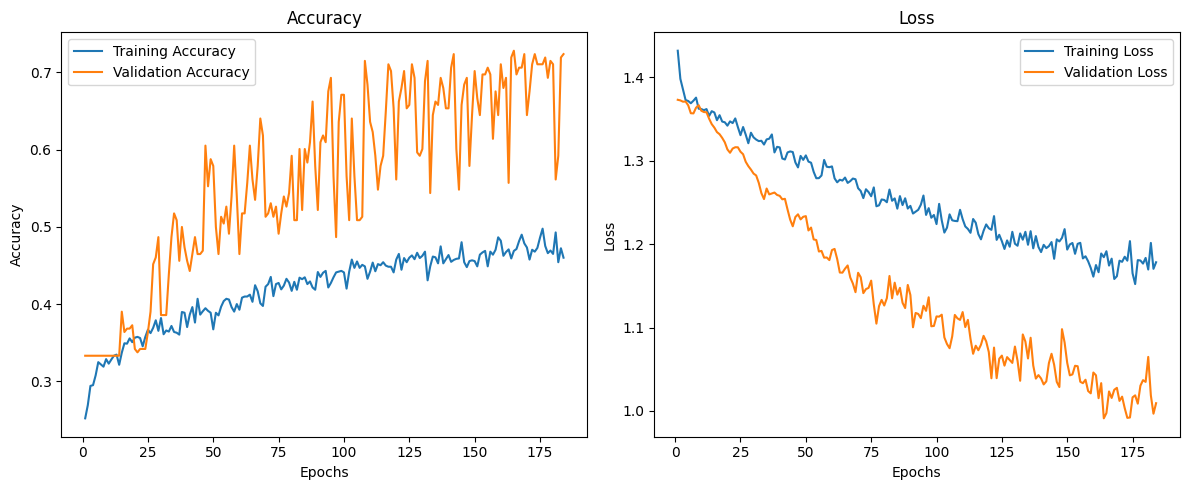

2/2 [==============================] - 0s 6ms/step - loss: 1.0093 - accuracy: 0.7237
Model 4
Epoch 176: early stopping
loss: 1.2320667505264282 - accuracy: 0.4851146936416626 - val_loss: 1.0821795463562012 - val_accuracy: 0.5789473652839661


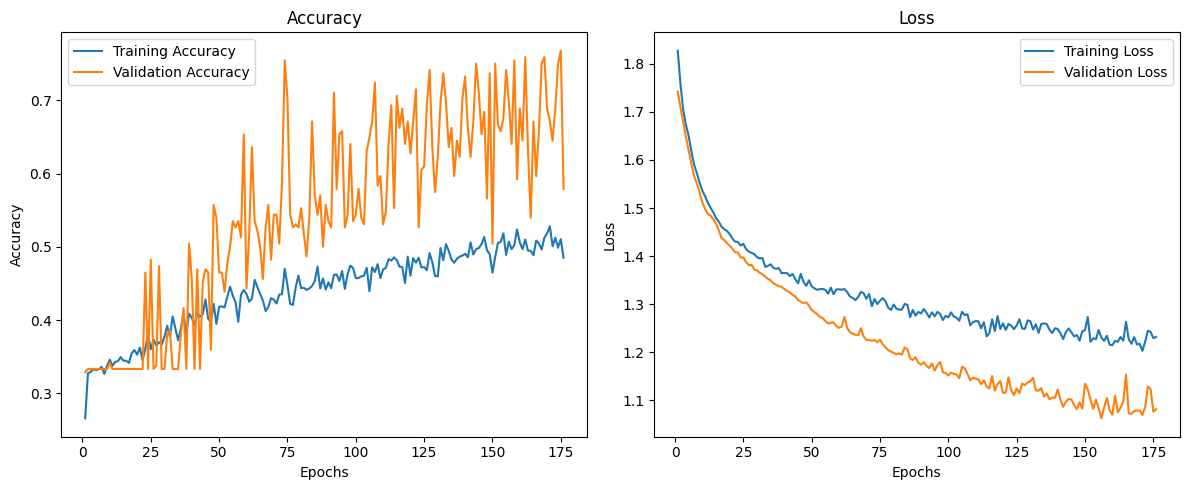

2/2 [==============================] - 0s 9ms/step - loss: 1.0822 - accuracy: 0.5789


In [20]:

for i, m in enumerate(models):

    print(f'Model {i}')
    m.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = m.fit(
        X_train,
        y_train,
        epochs=1000,
        batch_size=128,
        validation_data=(X_test, y_test),
        callbacks=[es_callback],
        verbose=0
    )
    plot_loss_accuracy(history)

    val_loss, val_acc = m.evaluate(X_test, y_test, batch_size=128)


# Lab 3

Додатковий метод

In [21]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Reshape, LSTM

model_cnn = tf.keras.models.Sequential([
    Input((21 * DIMENSIONS, )),
    Reshape((21, DIMENSIONS)),  # Reshape to 3D
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.4),
    Dense(30, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 241: early stopping
loss: 0.06572017818689346 - accuracy: 0.9780380725860596 - val_loss: 0.018025290220975876 - val_accuracy: 0.9956140518188477


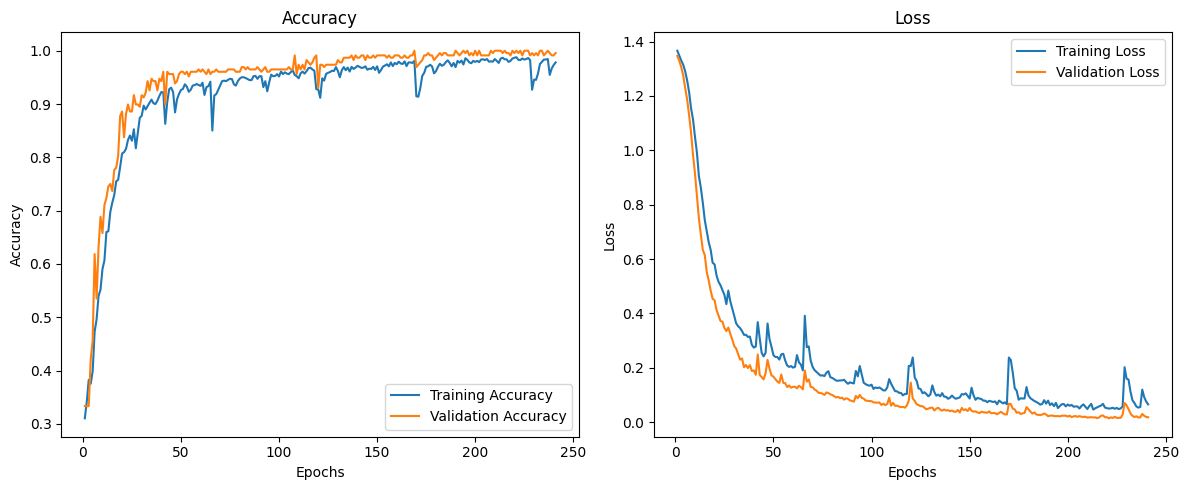

2/2 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.9956


In [22]:
history = model_cnn.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[es_callback],
    verbose=0
)
plot_loss_accuracy(history)

val_loss, val_acc = model_cnn.evaluate(X_test, y_test, batch_size=128)

In [25]:
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 21, 3)             0         
                                                                 
 conv1d (Conv1D)             (None, 19, 32)            320       
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 32)             0         
 D)                                                              
                                                                 
 dropout_11 (Dropout)        (None, 9, 32)             0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense_20 (Dense)            (None, 50)                14450     
                                                      

In [23]:
model_rnn = tf.keras.models.Sequential([
    Input((21 * DIMENSIONS, )),
    Reshape((21, DIMENSIONS)),  # Reshape to 3D
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(30),
    Dense(len(np.unique(y)), activation='softmax')
])

model_rnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 21, 3)             0         
                                                                 
 lstm (LSTM)                 (None, 21, 50)            10800     
                                                                 
 dropout_13 (Dropout)        (None, 21, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                9720      
                                                                 
 dense_23 (Dense)            (None, 4)                 124       
                                                                 
Total params: 20644 (80.64 KB)
Trainable params: 20644 (80.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 253: early stopping
loss: 0.1505110263824463 - accuracy: 0.9482674598693848 - val_loss: 0.11468109488487244 - val_accuracy: 0.969298243522644


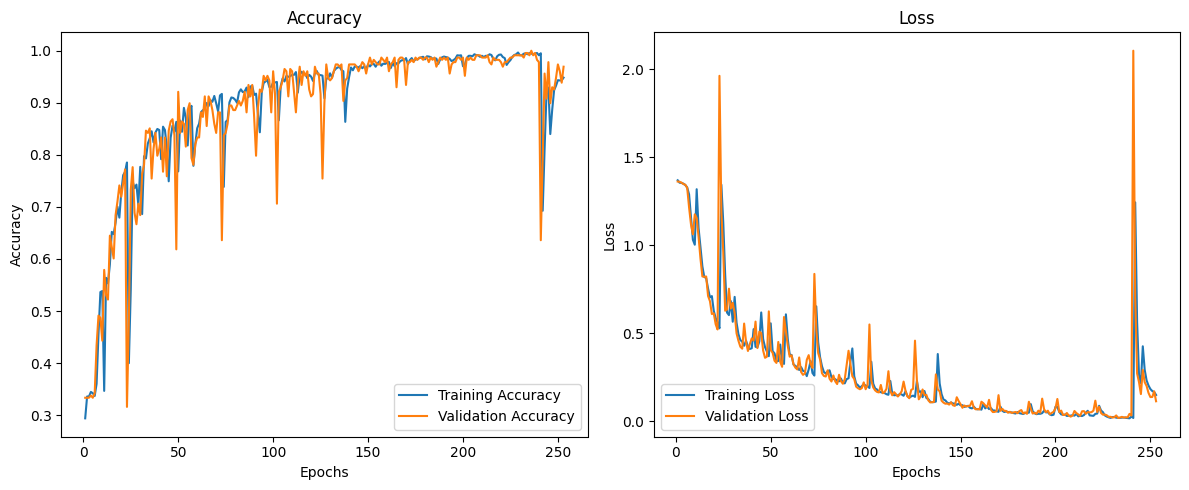

2/2 [==============================] - 0s 17ms/step - loss: 0.1147 - accuracy: 0.9693


In [24]:
history = model_rnn.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[es_callback],
    verbose=0
)
plot_loss_accuracy(history)

val_loss, val_acc = model_rnn.evaluate(X_test, y_test, batch_size=128)

# Порівняння результатів

Стаття - 88%

Відтворення - 79%

Покращення - 80%

Запропонований метод CNN - 99%

Запропонований метод RNN - 96%

